In [57]:
%matplotlib nbagg

import geofield
import dipole
import scipy, numpy
import newleg
import xyzfield
from matplotlib import pyplot, rcParams
rcParams.update({'font.family': "Source Sans Pro"})
rcParams.update({'font.size': 14})

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [75]:
import importlib
importlib.reload(dipole); importlib.reload(geofield); importlib.reload(xyzfield)

<module 'xyzfield' from '/home/josecper/Programs/python/xyzfield.py'>

In [2]:
sha=geofield.SHADIFData("../data/sha.dif.14k/coef_EPSL_tnmgh.dat", "../data/sha.dif.14k/error_coef_EPSL_tnmgh.dat")

__Bootstrap__

In [3]:
iterations = 10000

xs = numpy.zeros((iterations,len(sha.years)))
ys = xs.copy()
zs = xs.copy()

gshort = sha.gcomp[..., :8]
gshort_err = sha.gcomp_err[..., :8] #doesn't exist yet

for i in range(iterations):
    gi = gshort+numpy.random.randn(*gshort.shape)*gshort_err
    xs[i,:], ys[i,:], zs[i,:] = dipole.ecc_dipole(gi)
    
x = xs.sum(axis=0)/iterations
y = ys.sum(axis=0)/iterations
z = zs.sum(axis=0)/iterations

ss, zs, phis = dipole.xyz2cyl(xs,ys,zs)
phis = phis % (2*numpy.pi)
rs = numpy.sqrt(xs**2+ys**2+zs**2)
s, z, phi = dipole.xyz2cyl(x,y,z)
phi = phi % (2*numpy.pi)
r = numpy.sqrt(x**2+y**2+z**2)

s_dev = numpy.sqrt(((ss-s)**2).sum(axis=0)/iterations)
z_dev = numpy.sqrt(((zs-z)**2).sum(axis=0)/iterations)
r_dev = numpy.sqrt(((rs-r)**2).sum(axis=0)/iterations)
phi_dev = numpy.sqrt(((phis-phi)**2).sum(axis=0)/iterations)

del xs, ys, zs, phis, rs, ss

<IPython.core.display.Javascript object>


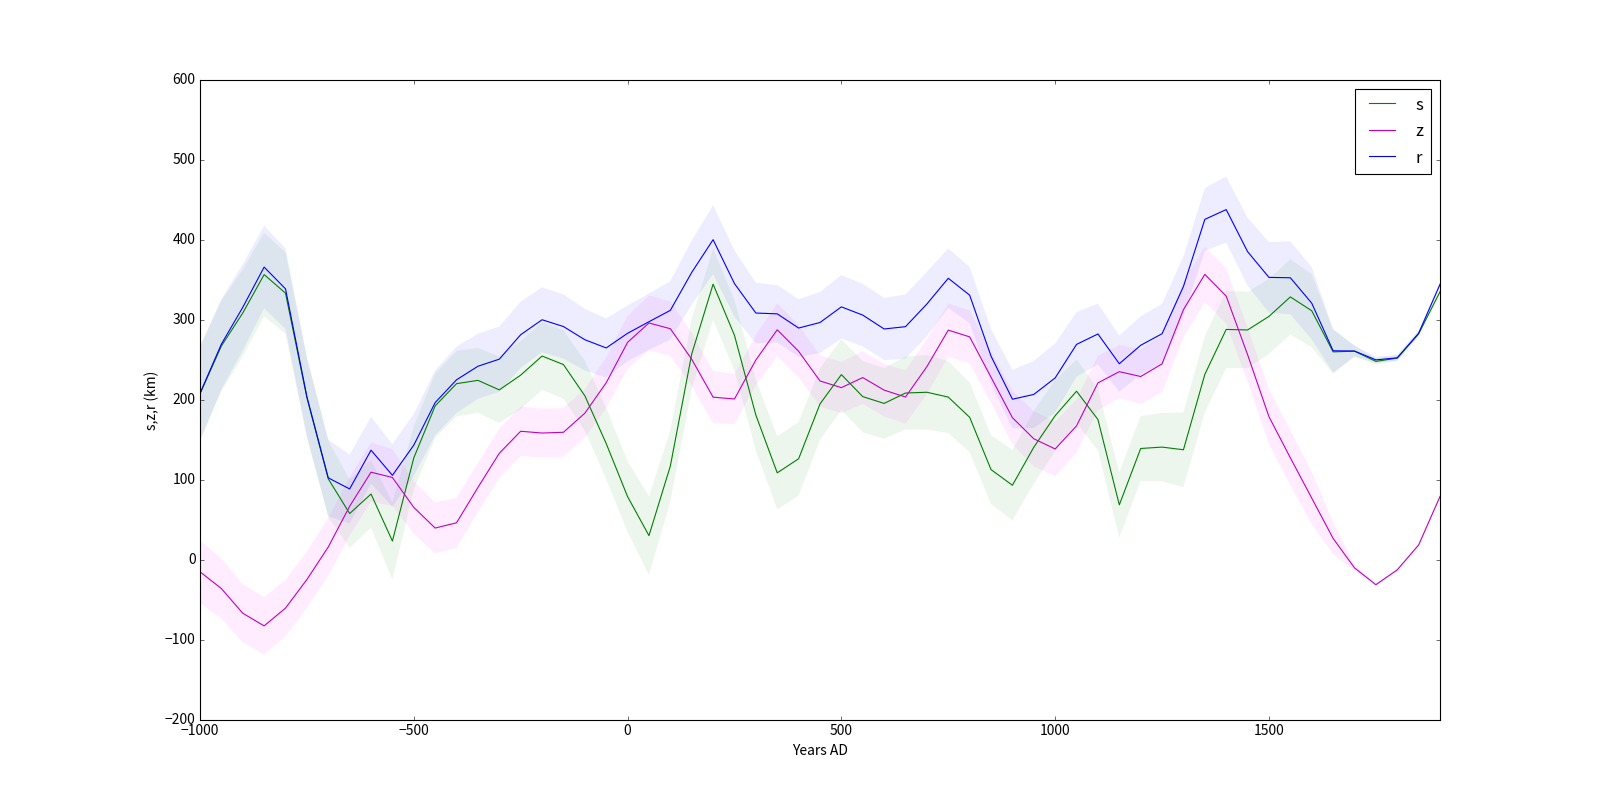

In [201]:
fig, ax = pyplot.subplots(figsize=(20,10))

ax.plot(sha.years, s, color="green", label="s")
ax.plot(sha.years, z, "m-", label="z")
ax.plot(sha.years, r, "b-", label="r")

ax.fill_between(sha.years, r-r_dev, r+r_dev, color="blue", lw=0, alpha=0.07)
ax.fill_between(sha.years, z-z_dev, z+z_dev, color="magenta", lw=0, alpha=0.07)
ax.fill_between(sha.years, s-s_dev, s+s_dev, color="green", lw=0, alpha=0.07)

ax.set_xlabel("Years AD")
ax.set_ylabel("s,z,r (km)")
ax.legend()

ax.set_xbound(-1000,sha.years[-1])

pyplot.show(fig)

<IPython.core.display.Javascript object>


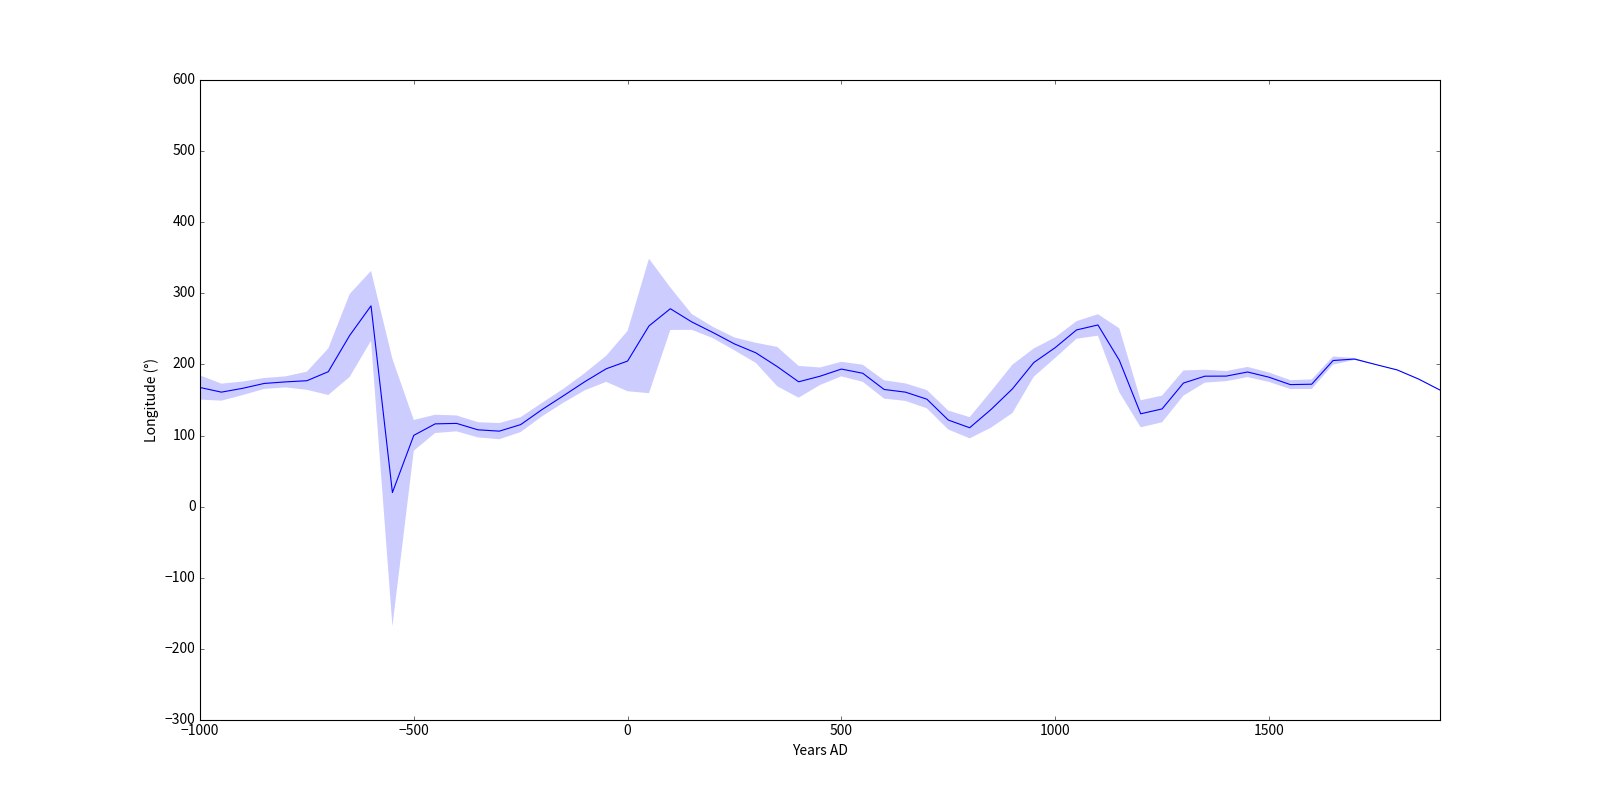

In [202]:
fig, ax = pyplot.subplots(figsize=(20,10))

ax.plot(sha.years, scipy.rad2deg(phi), "b-")
ax.fill_between(sha.years, scipy.rad2deg(phi-phi_dev), scipy.rad2deg(phi+phi_dev), lw=0, alpha=0.2)

ax.set_xlabel("Years AD")
ax.set_ylabel("Longitude (°)")

ax.set_xbound(-1000, sha.years[-1])

pyplot.show(fig)

In [4]:
p_dip=dipole.power(sha.gcomp, lmin=1, lmax=1)
p_quad=dipole.power(sha.gcomp, lmin=2, lmax=2)

In [5]:
power=dipole.power(sha.gcomp, lmin=1, lmax=2, separated=True)
p_sym=power[:,0]+power[:,3]
p_asym=power[:,1:3].sum(axis=1)+power[:,4:8].sum(axis=1)

<IPython.core.display.Javascript object>


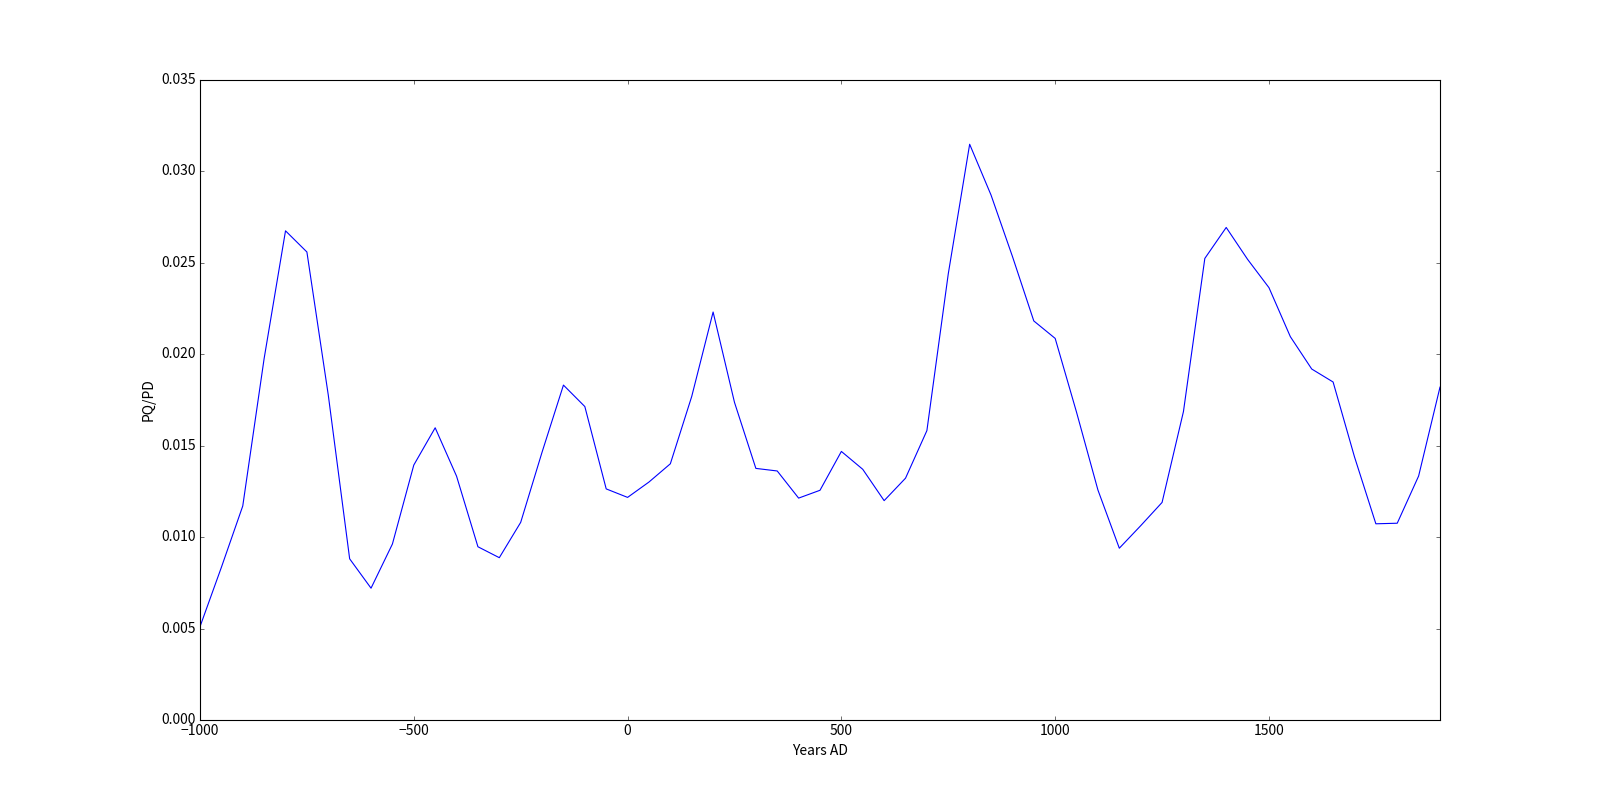

In [204]:
fig, ax = pyplot.subplots(figsize=(20,10))

#ax.plot(sha.years, p_dip)
#ax.plot(sha.years, p_quad)

ax.plot(sha.years, p_quad/p_dip)

ax.set_xbound(-1000, sha.years[-1])
ax.set_xlabel("Years AD")
ax.set_ylabel("PQ/PD")
pyplot.show(fig)

<IPython.core.display.Javascript object>


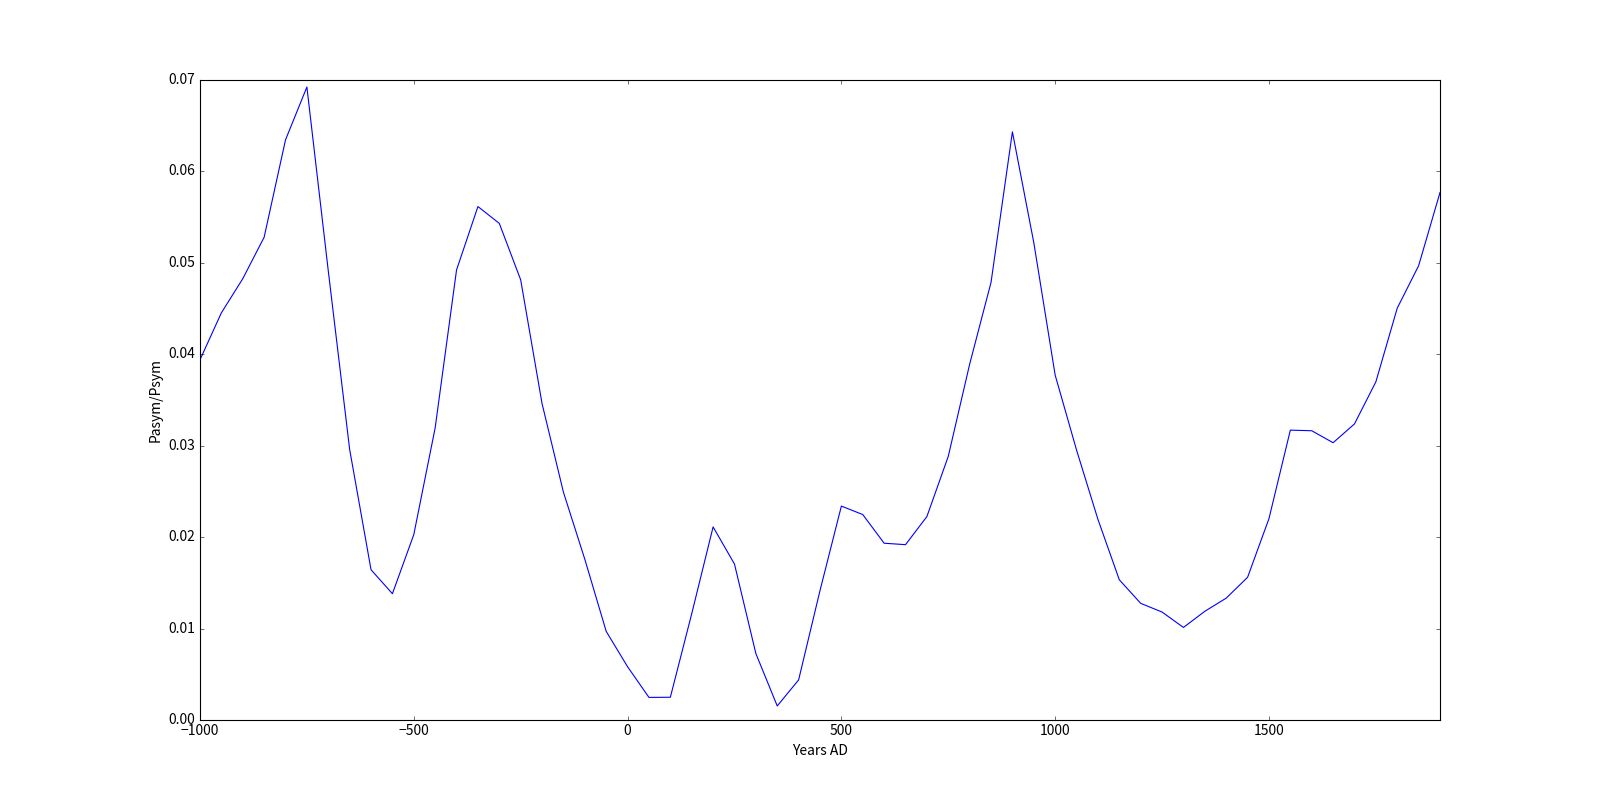

In [205]:
fig, ax = pyplot.subplots(figsize=(20,10))

#ax.plot(sha.years, p_dip)
#ax.plot(sha.years, p_quad)

ax.plot(sha.years, p_asym/p_sym)

ax.set_xbound(-1000, sha.years[-1])
ax.set_xlabel("Years AD")
ax.set_ylabel("Pasym/Psym")
pyplot.show(fig)

In [7]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


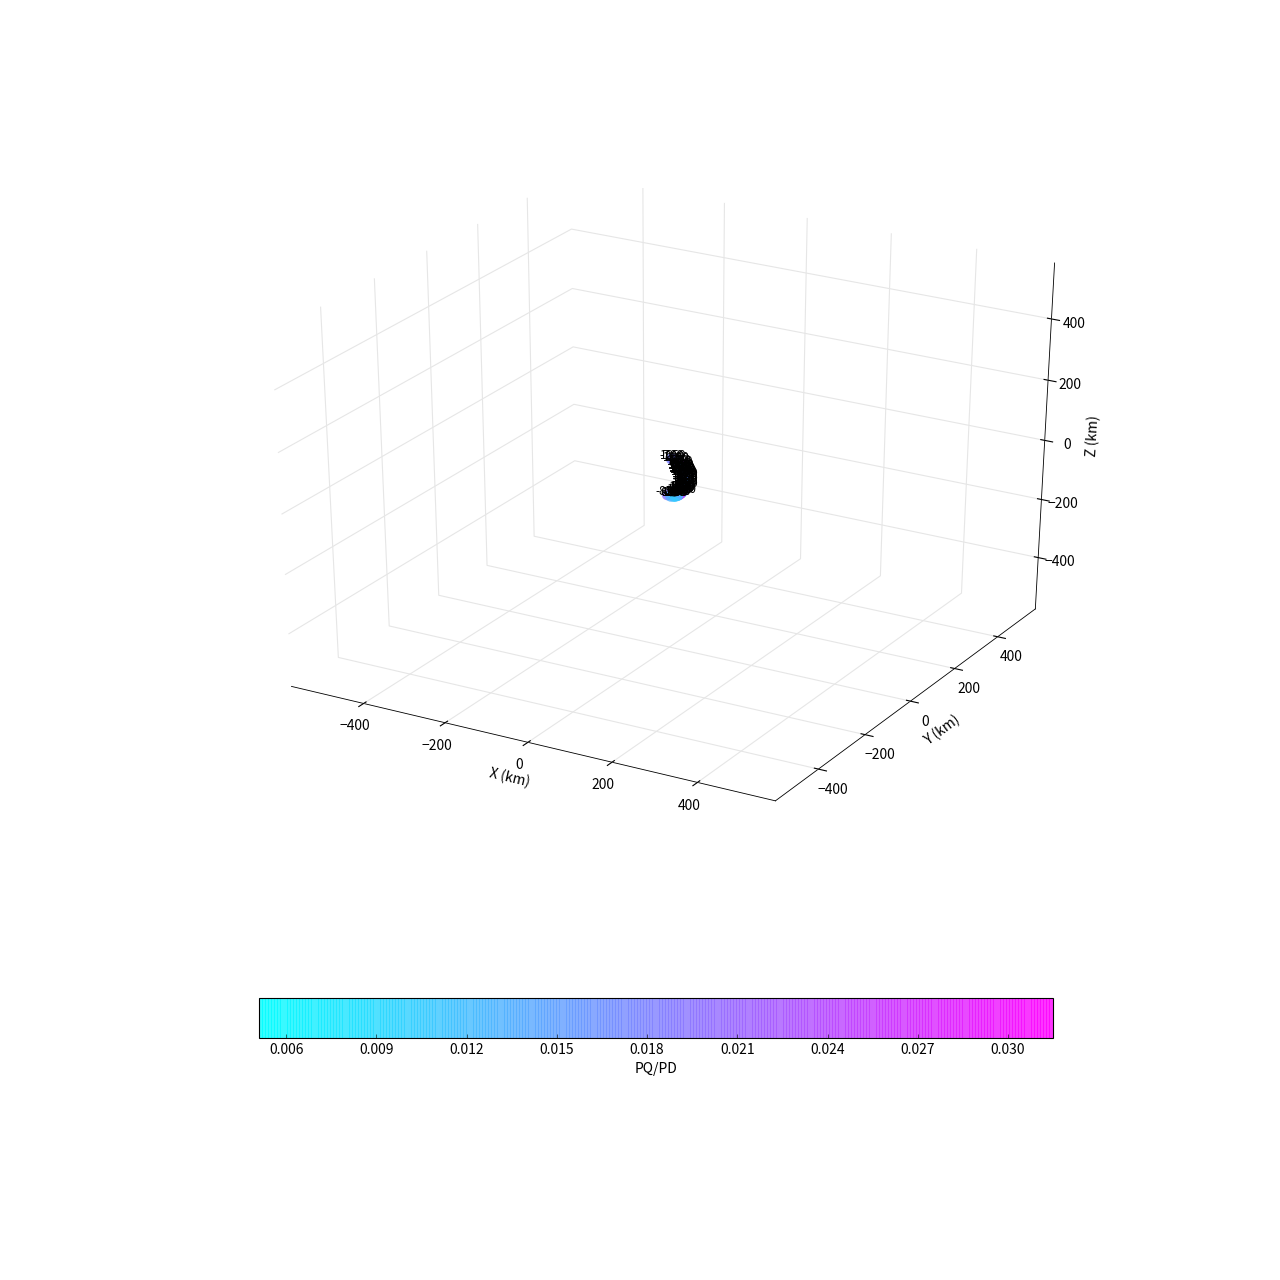

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40000 but corresponding boolean dimension is 279
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40000 but corresponding boolean dimension is 279
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40000 but corresponding boolean dimension is 279


In [220]:
fig = pyplot.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

years = numpy.array(sha.years)

ax.plot(x[years >= -1000],y[years >= -1000],z[years >= -1000], alpha=0.6, color="black")
ax.plot(x[years <= -1000],y[years <= -1000],z[years <= -1000], alpha=0.3, color="black", ls="--")

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

xs = x[years >= -1000]; ys=y[years >= -1000]; zs=z[years >= -1000]; ts=years[years >= -1000]

for xi,yi,zi,ti in zip(xs,ys,zs,ts):
    ax.text(xi,yi,zi,str(int(ti)), fontsize=12, horizontalalignment="center")
       
c=ax.scatter(xs,ys,zs,
           #s=(30000*p_quad/p_dip)[years >= -1000],
           #c="b",
           c=(p_quad/p_dip)[years >= -1000],
           s=100,
           lw=0, alpha=0.8,
           cmap="cool")

ax.set_xbound(-max(abs(r))*1.05, max(abs(r))*1.05)
ax.set_ybound(-max(abs(r))*1.05, max(abs(r))*1.05)
ax.set_zbound(-max(abs(r))*1.05, max(abs(r))*1.05)

pyplot.colorbar(mappable=c, ax=ax, label="PQ/PD", orientation="horizontal", shrink=0.8)

ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")

<IPython.core.display.Javascript object>


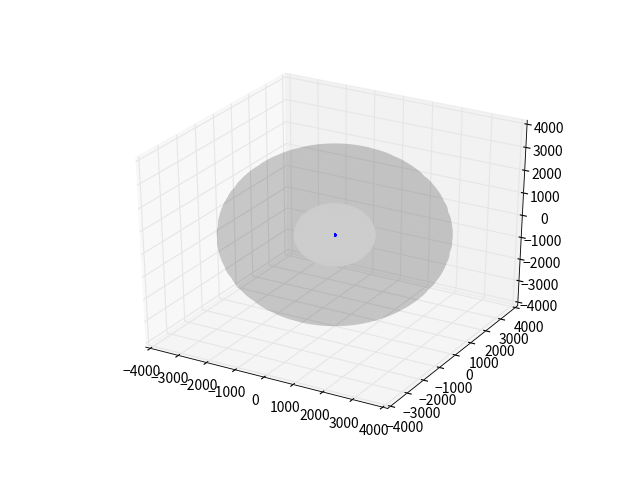

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40000 but corresponding boolean dimension is 279
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 40000 but corresponding boolean dimension is 279


In [199]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

years = numpy.array(sha.years)

ax.plot(x[years >= -1000],y[years >= -1000],z[years >= -1000])
ax.plot(x[years <= -1000],y[years <= -1000],z[years <= -1000], alpha=0.4, color="blue")


u = numpy.linspace(0, 2 * numpy.pi, 100)
v = numpy.linspace(0, numpy.pi, 100)

xn = 3520 * numpy.outer(numpy.cos(u), numpy.sin(v))
yn = 3520 * numpy.outer(numpy.sin(u), numpy.sin(v))
zn = 3520 * numpy.outer(numpy.ones(numpy.size(u)), numpy.cos(v))
ax.plot_surface(xn, yn, zn, rstride=4, cstride=4, color='k', linewidth=0, shade=False, alpha=0.1)
xn = 1220 * numpy.outer(numpy.cos(u), numpy.sin(v))
yn = 1220 * numpy.outer(numpy.sin(u), numpy.sin(v))
zn = 1220 * numpy.outer(numpy.ones(numpy.size(u)), numpy.cos(v))
ax.plot_surface(xn, yn, zn, rstride=4, cstride=4, color='w', linewidth=0, shade=False, alpha=1.0)

ax.scatter(x[-1],y[-1],z[-1])

In [6]:
dip_theta, dip_phi = dipole.coords(sha.gcomp)

<IPython.core.display.Javascript object>


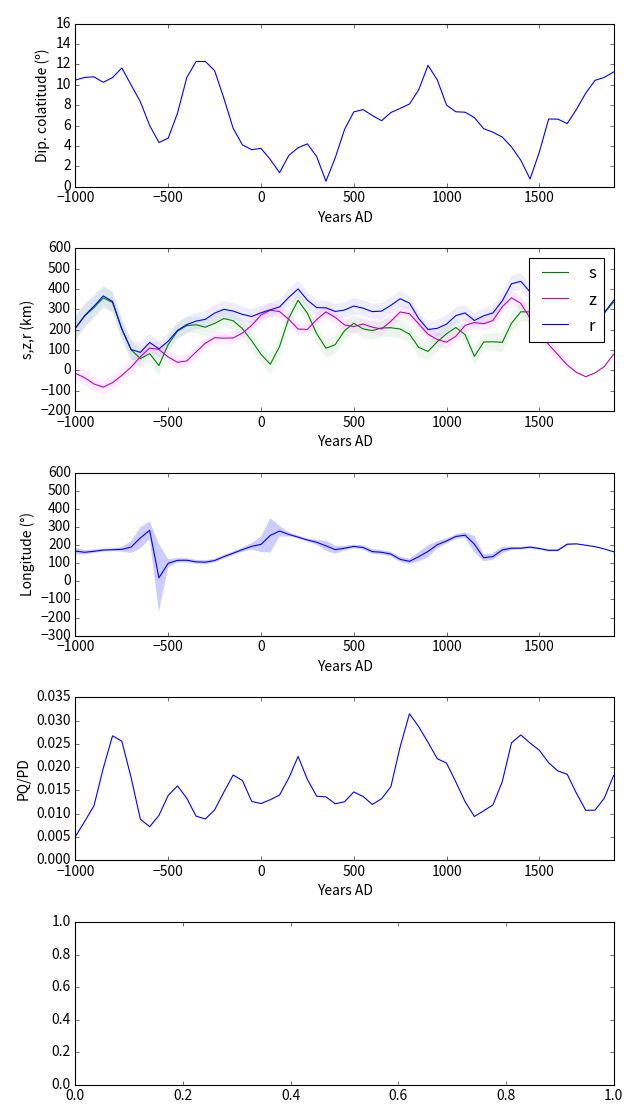

In [206]:
fig, axes = pyplot.subplots(5,1,figsize=(8,14))

axes[0].plot(sha.years, numpy.rad2deg(dip_theta),
        #sha.years, numpy.rad2deg(dip_phi), "+"
       )
axes[0].set_xbound(-1000, sha.years[-1])
axes[0].set_xlabel("Years AD")
axes[0].set_ylabel("Dip. colatitude (º)")

axes[1].plot(sha.years, s, color="green", label="s")
axes[1].plot(sha.years, z, "m-", label="z")
axes[1].plot(sha.years, r, "b-", label="r")

axes[1].fill_between(sha.years, r-r_dev, r+r_dev, color="blue", lw=0, alpha=0.07)
axes[1].fill_between(sha.years, z-z_dev, z+z_dev, color="magenta", lw=0, alpha=0.07)
axes[1].fill_between(sha.years, s-s_dev, s+s_dev, color="green", lw=0, alpha=0.07)

axes[1].set_xlabel("Years AD")
axes[1].set_ylabel("s,z,r (km)")
axes[1].legend()

axes[1].set_xbound(-1000,sha.years[-1])

axes[2].plot(sha.years, scipy.rad2deg(phi), "b-")
axes[2].fill_between(sha.years, scipy.rad2deg(phi-phi_dev), scipy.rad2deg(phi+phi_dev), lw=0, alpha=0.2)

axes[2].set_xlabel("Years AD")
axes[2].set_ylabel("Longitude (°)")

axes[2].set_xbound(-1000, sha.years[-1])

axes[3].plot(sha.years, p_quad/p_dip)

axes[3].set_xbound(-1000, sha.years[-1])
axes[3].set_xlabel("Years AD")
axes[3].set_ylabel("PQ/PD")

pyplot.tight_layout()
pyplot.show(fig)

In [6]:
sha.gcomp[0].shape

(120,)

In [11]:
import xyzfield; import newleg; import fibonacci_sphere
theta,phi=fibonacci_sphere.grid(10000)

In [22]:
from mpl_toolkits.basemap import Basemap

<IPython.core.display.Javascript object>


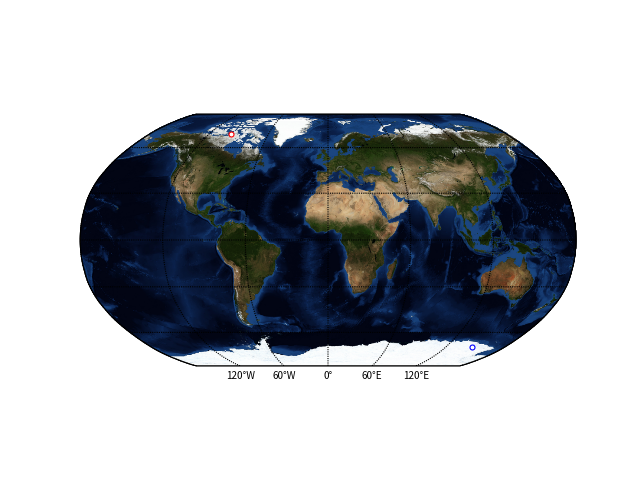

In [213]:
base=Basemap(projection="robin", lon_0=0.0, resolution="l")

fig, ax = pyplot.subplots()
#base.drawcoastlines(ax=ax)
base.drawparallels(numpy.arange(-60.,90.,30.),ax=ax)
base.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1],fontsize=10,ax=ax)
base.drawmapboundary(ax=ax)

base.scatter([numpy.rad2deg(phipole)],[90-numpy.rad2deg(thpole)], latlon=True, ax=ax,
             c="#FFFFFF", marker="o", edgecolor="red")

base.scatter([numpy.rad2deg(phisouth)],[90-numpy.rad2deg(thsouth)], latlon=True, ax=ax,
             c="#FFFFFF", marker="o", edgecolor="blue")

#base.fillcontinents(color='coral',lake_color='aqua', zorder=0)
base.bluemarble(scale=0.25, zorder=0)
#base.warpimage(image="../../Pictures/Captura de pantalla_2016-06-09_12-41-41.png")

pyplot.show(fig)

__Entropy__

In [13]:
order = 10
prob = numpy.zeros((len(sha.years),order))

In [14]:
pow_total = numpy.zeros_like(sha.years)

for l in range(order):
    power = dipole.power(sha.gcomp, l+1, l+1)
    prob[:,l] = power
    pow_total += power
    
prob = prob / pow_total[:, numpy.newaxis]

info = numpy.zeros_like(prob)
info[prob != 0] = prob[prob != 0] * numpy.log(prob[prob != 0])

info = info.sum(axis=1)

k_entropy = -numpy.gradient(info, 50)
d_k_entropy = numpy.gradient(k_entropy,50)

In [15]:
poly = numpy.polyfit(years, info, 2)

NameError: name 'years' is not defined

<IPython.core.display.Javascript object>


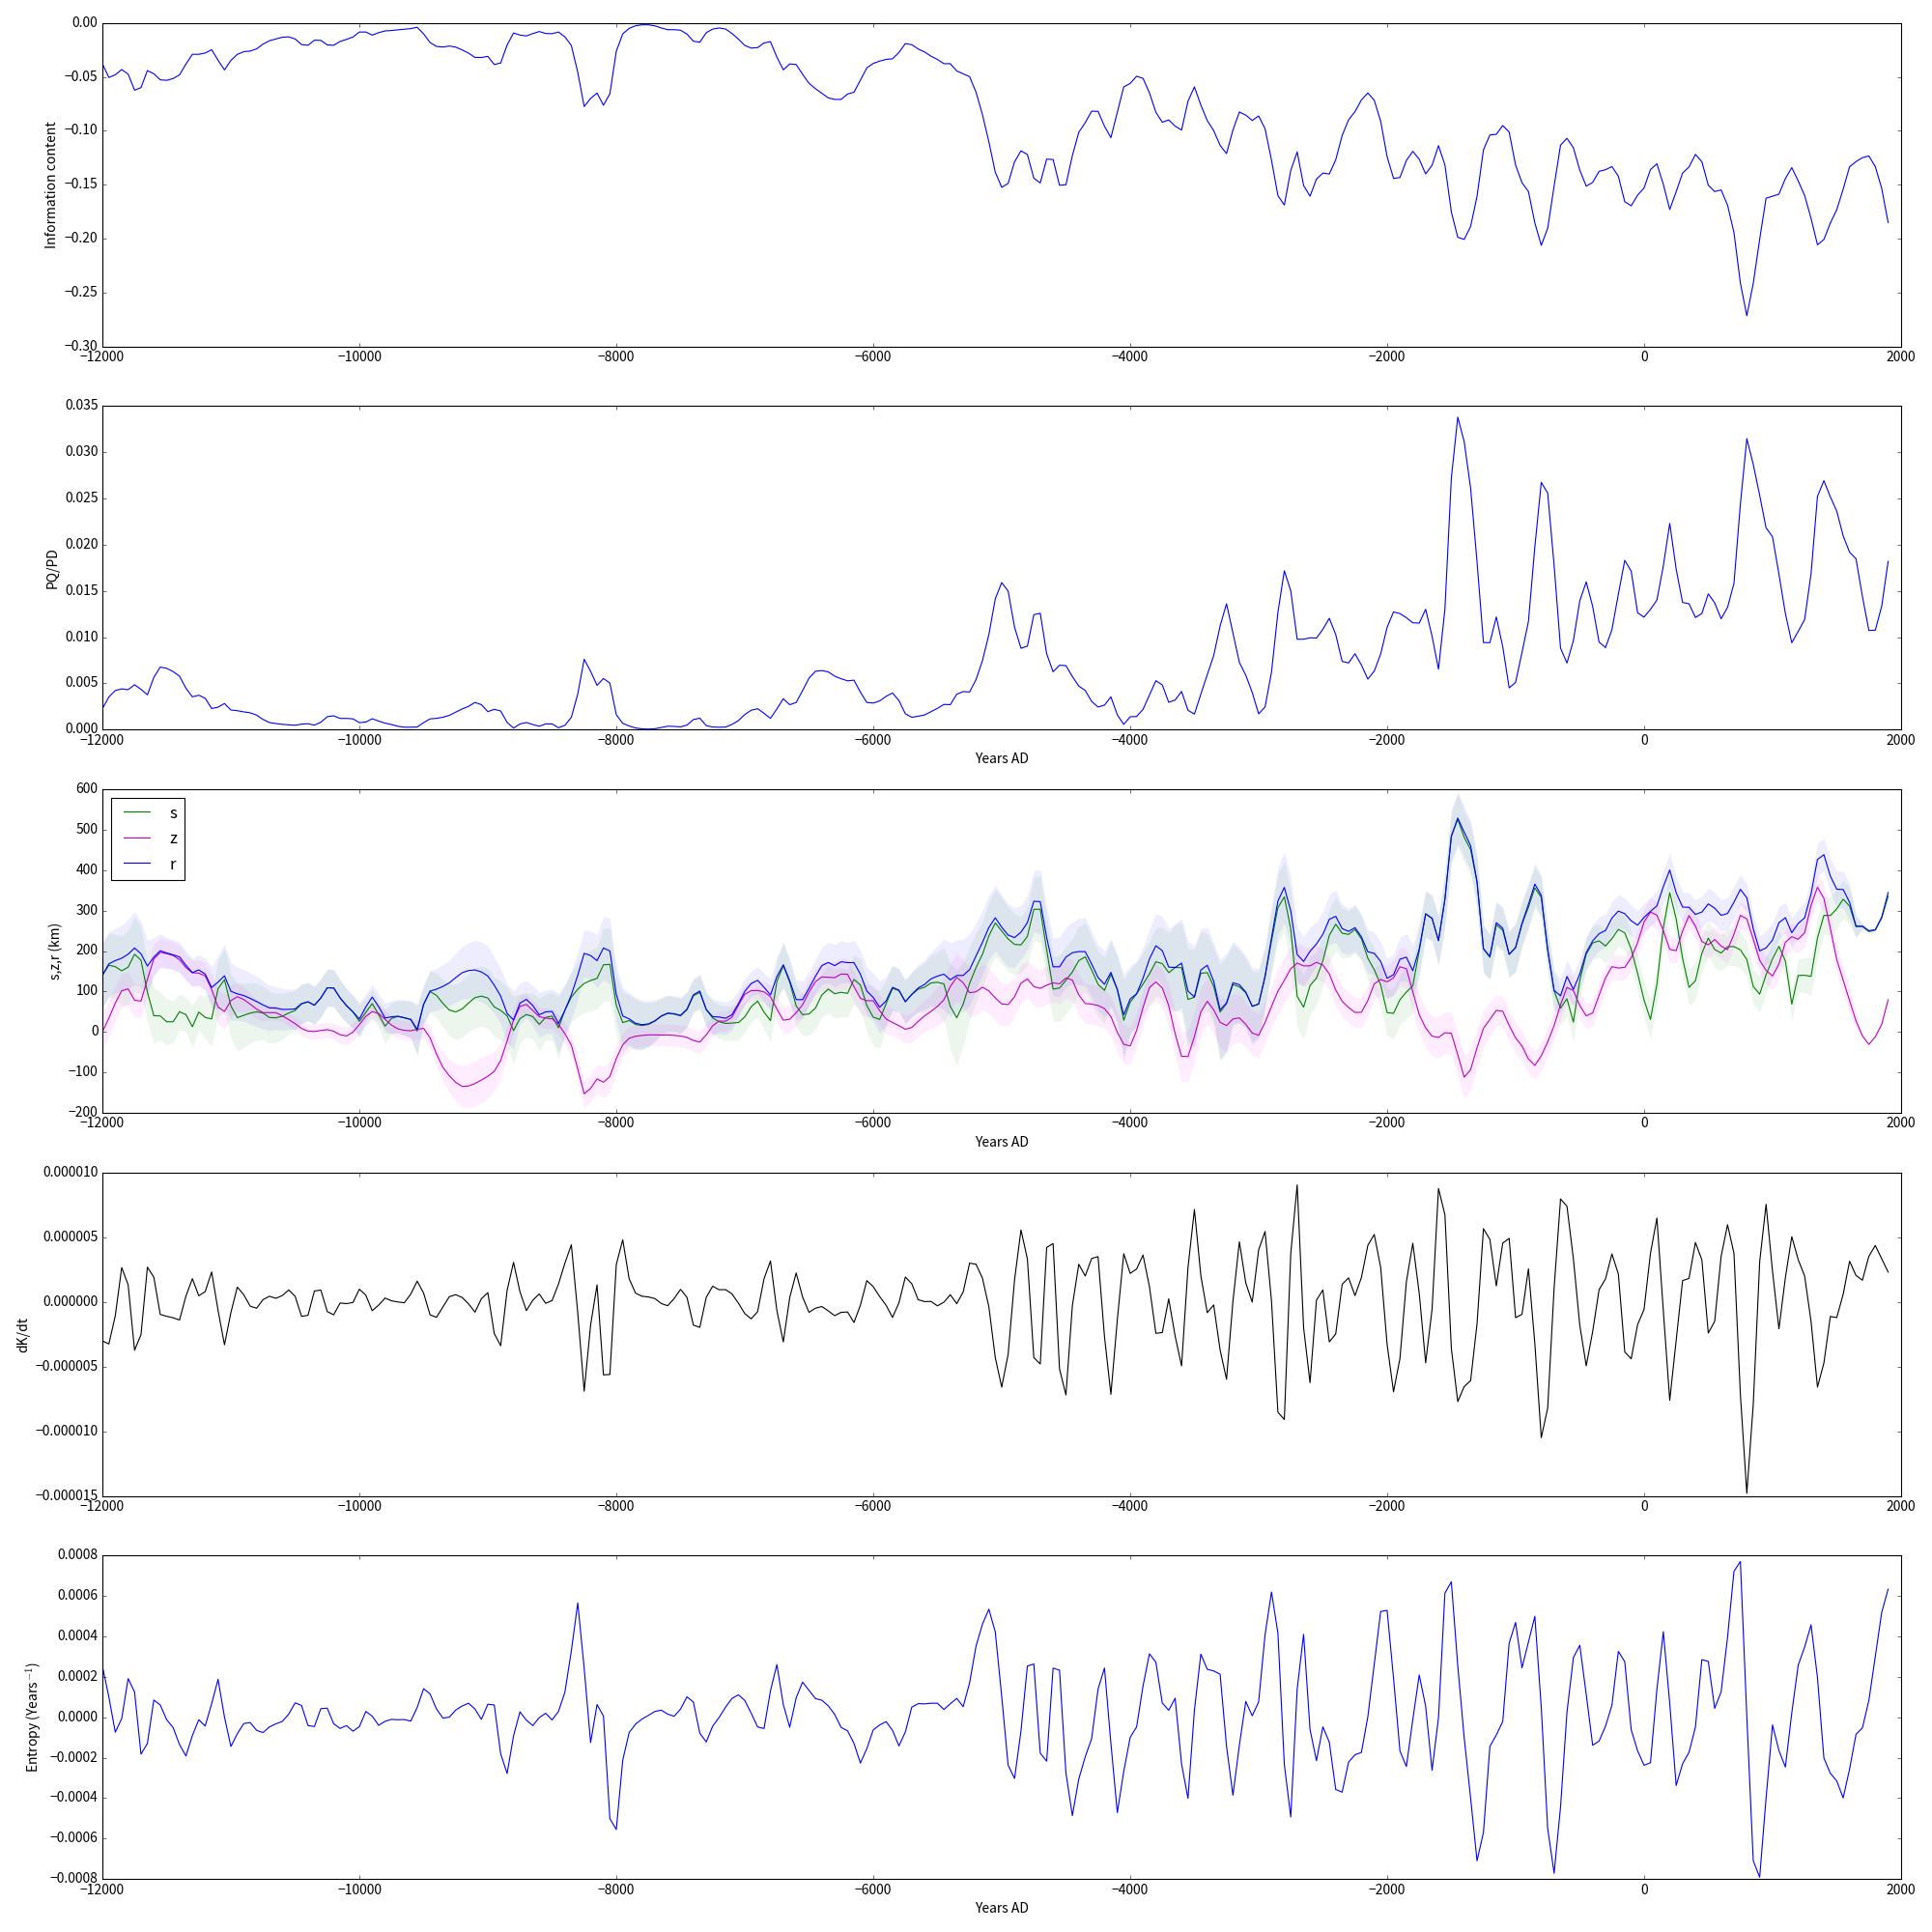

In [16]:
fig, (ax1,ax4,ax3,ax5,ax2) = pyplot.subplots(5,1, figsize=(25,25))

years = numpy.array(sha.years)

ax1.plot(years, info)
ax2.plot(years, k_entropy)

ax2.set_xlabel("Years AD")
ax1.set_ylabel("Information content")
ax2.set_ylabel("Entropy (Years$^{-1}$)")
#ax.plot(years, numpy.polyval(poly, years))

ax3.plot(sha.years, s, color="green", label="s")
ax3.plot(sha.years, z, "m-", label="z")
ax3.plot(sha.years, r, "b-", label="r")

ax3.fill_between(sha.years, r-r_dev, r+r_dev, color="blue", lw=0, alpha=0.07)
ax3.fill_between(sha.years, z-z_dev, z+z_dev, color="magenta", lw=0, alpha=0.07)
ax3.fill_between(sha.years, s-s_dev, s+s_dev, color="green", lw=0, alpha=0.07)

ax3.set_xlabel("Years AD")
ax3.set_ylabel("s,z,r (km)")
ax3.legend(loc="upper left")

#ax3.set_xbound(-2000,sha.years[-1])

ax4.plot(sha.years, p_quad/p_dip)

#ax4.set_xbound(-2000, sha.years[-1])
ax4.set_xlabel("Years AD")
ax4.set_ylabel("PQ/PD")

ax5.plot(years, d_k_entropy, "k")
ax5.set_ylabel("dK/dt")

def onclick(event):
    for ax in (ax1, ax2, ax3, ax4, ax5):
        if event.inaxes is ax3:
            ax.plot([event.xdata, event.xdata], [-1000,1000], "r--", scaley=False)
        else:
            ax.plot([event.xdata, event.xdata], [-1000,1000], "k--", scaley=False)
        
cid = fig.canvas.mpl_connect('button_press_event', onclick)

pyplot.tight_layout()
pyplot.show(fig)

Notas:

- Picos de PQ/PD coinciden con picos de baja información (obvio porque el dipolo es la mayoría de la energía, el aumento relativo de otras componentes siempre conlleva mayor "reparto" o menor información.
- Picos de info == entropía cero

__Find magnetic north__

In [17]:
import scipy.optimize

In [18]:
gcoefs = sha.gcomp[-1]

def inc_value(coords):
    x,y,z=xyzfield.xyzfieldv2(gcoefs, numpy.array([coords[0]]), numpy.array([coords[1]]), regular=False)
    inc=numpy.arctan2(z, numpy.sqrt(x**2+y**2))
    return -inc

In [83]:
solution_north = scipy.optimize.minimize(inc_value, (1, 0.3), bounds=((0.0, 2*numpy.pi), (0.1, numpy.pi-0.1)), options={"disp" : True})
solution_south = scipy.optimize.minimize(lambda x: -inc_value(x), (1, 0.3), bounds=((0.0, 2*numpy.pi), (0.1, numpy.pi-0.1)), options={"disp" : True})
north_phi, north_theta = numpy.rad2deg(solution_north.x)
south_phi, south_theta = numpy.rad2deg(solution_south.x)

solution_north, solution_south

(      fun: array([-1.57079632])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.13809831,  0.34748548])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 216
      nit: 32
   status: 0
  success: True
        x: array([ 4.55496741,  0.33424286]),
       fun: array([-1.53878036])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.15121144, -0.1543714 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 9
   status: 0
  success: True
        x: array([ 2.78813526,  2.83106206]))

<IPython.core.display.Javascript object>


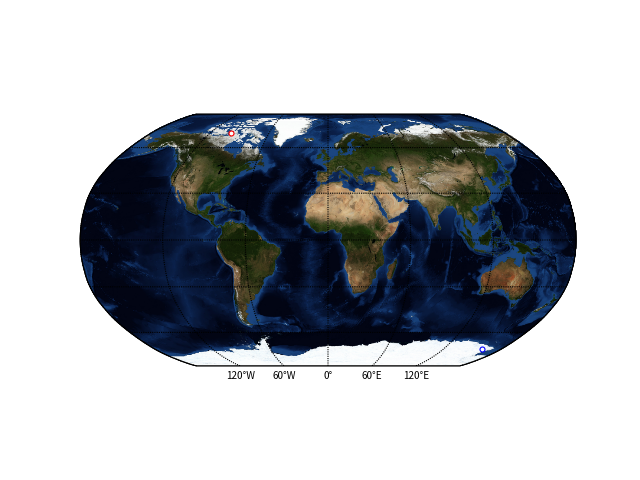

In [84]:
base=Basemap(projection="robin", lon_0=0.0, resolution="l")

fig, ax = pyplot.subplots()
#base.drawcoastlines(ax=ax)
base.drawparallels(numpy.arange(-60.,90.,30.),ax=ax)
base.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1],fontsize=10,ax=ax)
base.drawmapboundary(ax=ax)

base.scatter(numpy.array(north_phi),90-numpy.array(north_theta), latlon=True, ax=ax,
             c="#FFFFFF", marker="o", edgecolor="red")

base.scatter(numpy.array(south_phi),90-numpy.array(south_theta), latlon=True, ax=ax,
             c="#FFFFFF", marker="o", edgecolor="blue")

#base.fillcontinents(color='coral',lake_color='aqua', zorder=0)
base.bluemarble(scale=0.25, zorder=0)
#base.warpimage(image="../../Pictures/Captura de pantalla_2016-06-09_12-41-41.png")

pyplot.show(fig)

__Now do many thing ok__

In [66]:
northlons=[]; northlats=[]
southlons=[]; southlats=[]

startingpoint_north=(numpy.pi, numpy.pi/2)
startingpoint_south=(numpy.pi, numpy.pi/2)


def inc_value(coords, gcomp):
    x,y,z=xyzfield.xyzfieldv2(gcomp, numpy.array([coords[0]]), numpy.array([coords[1]]), regular=False)
    inc=numpy.arctan2(z, numpy.sqrt(x**2+y**2))
    return -inc

for i, year in enumerate(sha.years):
    solution_north = scipy.optimize.minimize(inc_value, startingpoint_north, args=(sha.gcomp[i]),
                                             #bounds=((0.0, 2*numpy.pi), (0.1, numpy.pi-0.1)),
                                             method="Powell",
                                             #options={"disp" : True}
                                            )
    solution_south = scipy.optimize.minimize(lambda x,g: -inc_value(x,g), startingpoint_south, args=(sha.gcomp[i]),
                                             #bounds=((0.0, 2*numpy.pi), (0.1, numpy.pi-0.1)),
                                             method="Powell",
                                             #options={"disp" : True}
                                            )
         
    startingpoint_north = solution_north.x
    startingpoint_south = solution_south.x
    
    north_lon, north_lat = numpy.rad2deg(solution_north.x[0]), 90-numpy.rad2deg(solution_north.x[1])
    south_lon, south_lat = numpy.rad2deg(solution_south.x[0]), 90-numpy.rad2deg(solution_south.x[1])
    
    northlons.append(north_lon); northlats.append(north_lat)
    southlons.append(south_lon); southlats.append(south_lat)
    
    print("year: {0:<25} {1}".format(int(year), (north_lon, north_lat, south_lon, south_lat)))
    

year: -12000                    (101.16440194440521, 101.49873503488176, 267.37460143182295, -104.21379354898772)
year: -11950                    (97.570271221290355, 101.46353375177449, 257.17750995168808, -105.0626016057976)
year: -11900                    (92.200644746335612, 79.221035637887184, 253.89476627104656, -105.89515193450023)
year: -11850                    (84.529410626928126, 81.006372612635644, 255.47413006054498, -105.57643691202162)
year: -11800                    (67.590893405508936, 83.957921386548563, 261.91381586216301, -103.09133399720756)
year: -11750                    (27.979098023105951, 86.258887268306552, 275.98080942718968, -99.146746189998794)
year: -11700                    (12.602166180698823, 86.163941010959377, 282.39039259281265, -96.356405043997)
year: -11650                    (25.106579641863934, 86.317947422671466, 255.49060373630354, -95.302521657163595)
year: -11600                    (37.958659645129053, 86.584656434897497, 227.03179636701762,

__Ahora con lmax = 4__

In [82]:
northlons_1, northlats_1 = xyzfield.magnetic_north(sha.gcomp, 1, south=False)
northlons_2, northlats_2 = xyzfield.magnetic_north(sha.gcomp, 2, south=False)
northlons_4, northlats_4 = xyzfield.magnetic_north(sha.gcomp, 4, south=False)
northlons_10, northlats_10 = xyzfield.magnetic_north(sha.gcomp, 10, south=False)

In [ ]:
northlon_max=[]
northlat_max=[]

theta, phi = fibonacci_sphere.grid(40000)

for i,year in enumerate(sha.years):
    x,y,z = xyzfield.xyzfieldv2(sha.gcomp[i], phi, theta)
    inc = numpy.arctan2(z,numpy.sqrt(x**2+y**2))
    northlon_max.append(numpy.rad2deg(phi[inc == numpy.max(inc)]))
    northlat_max.append(90-numpy.rad2deg(theta[inc == numpy.max(inc)]))
    
    #print("year: {0:<25} {1}".format(int(year), (northlon_max[-1], northlat_max[-1])))

In [49]:
magnetic_north_data = numpy.loadtxt("../data/sha.dif.14k/magnetic_north.csv",delimiter=",")

magnetic_north_data = magnetic_north_data[magnetic_north_data[:,0] > -6000]

magnetic_north_years = magnetic_north_data[:, 0]
magnetic_north_lat = magnetic_north_data[:, 1]
magnetic_north_lon = magnetic_north_data[:, 2]

<IPython.core.display.Javascript object>


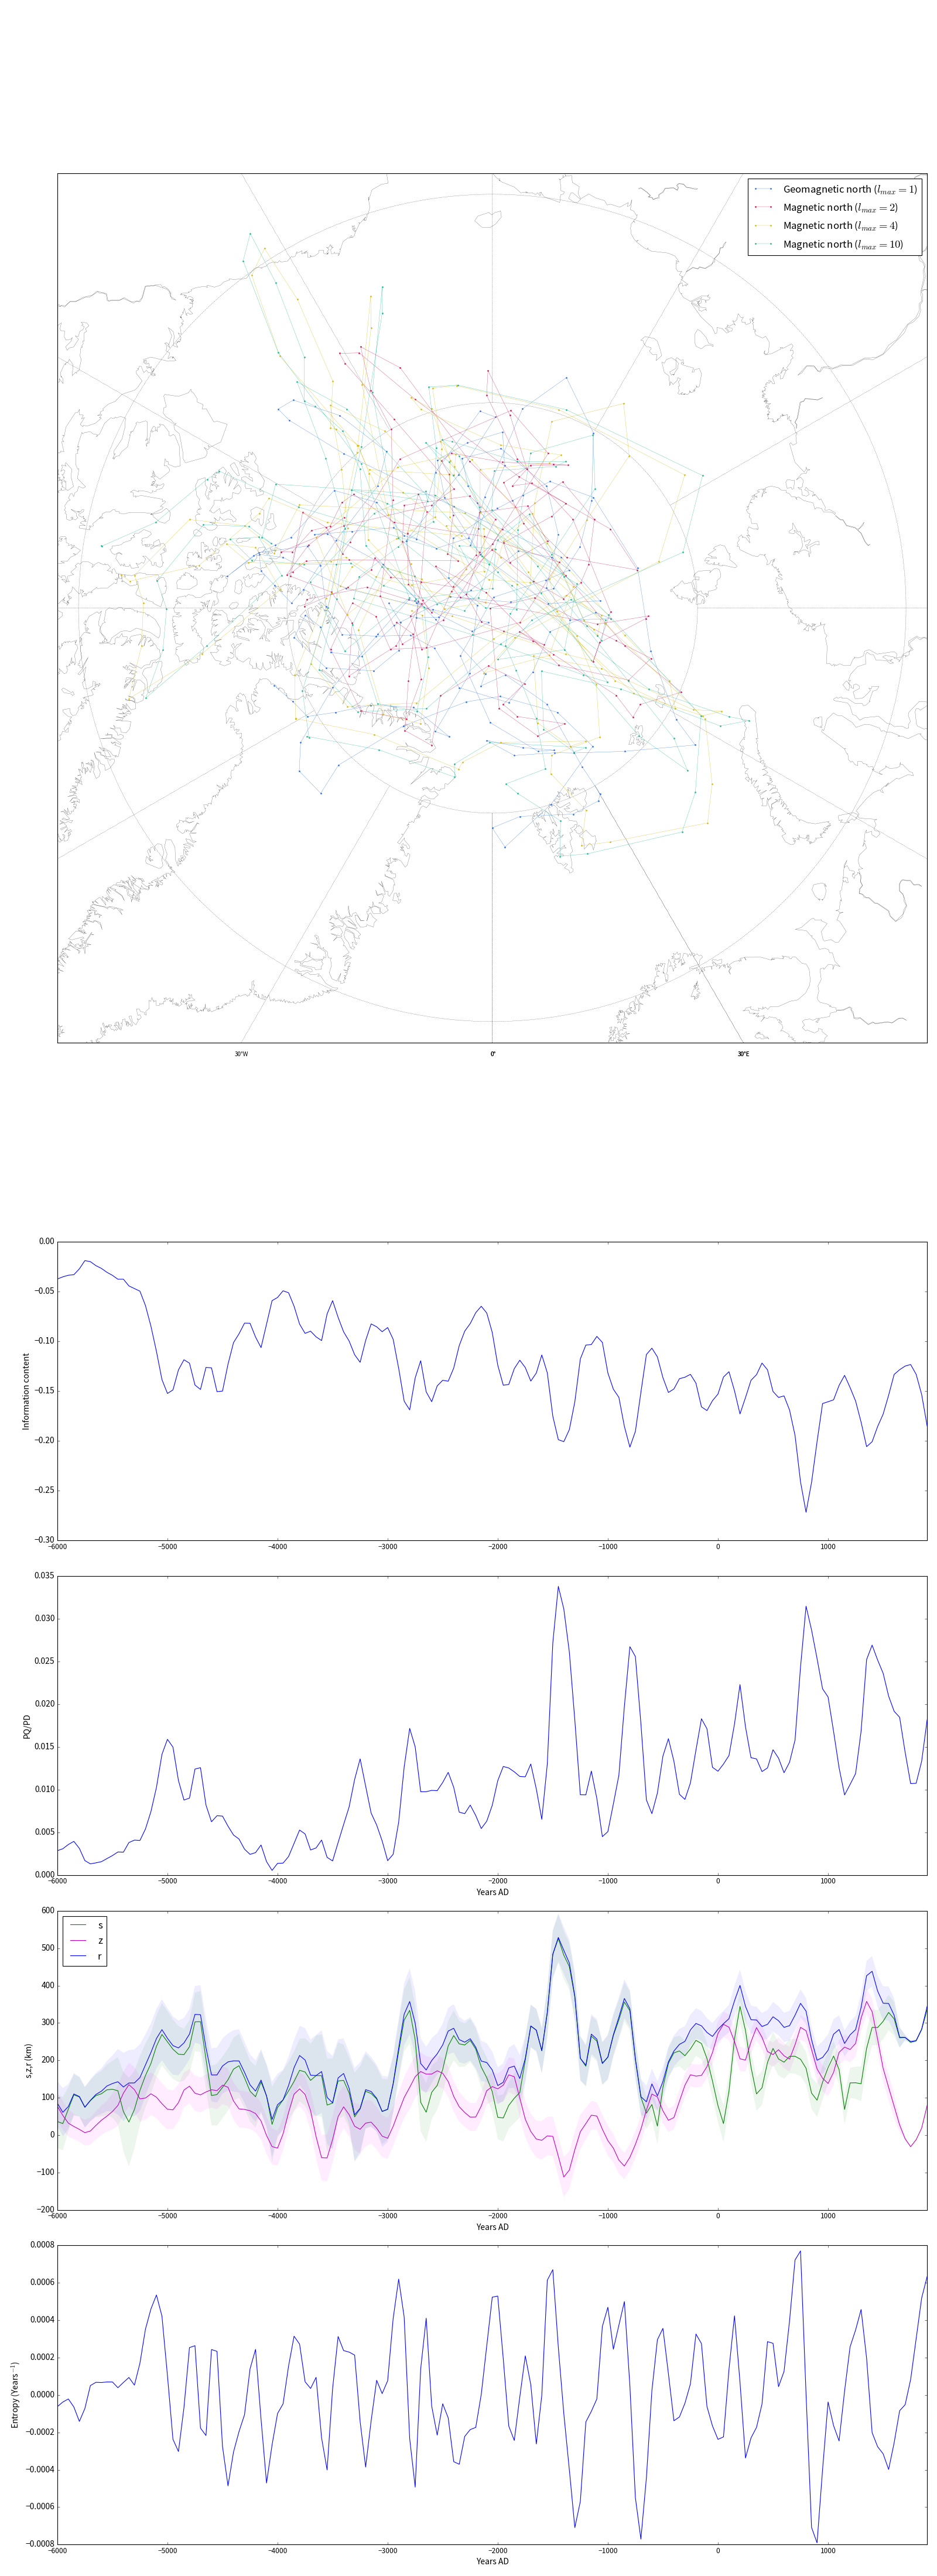

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 159 but corresponding boolean dimension is 279
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 159 but corresponding boolean dimension is 279


In [90]:
base = Basemap(projection='npstere',boundinglat=69,lon_0=0,resolution='l')

fig, (ax,ax1,ax4,ax3,ax2) = pyplot.subplots(5,1,figsize=(20,55), gridspec_kw={"height_ratios" : [4,1,1,1,1]})
base.drawcoastlines(ax=ax, linewidth=0.2)
base.drawparallels(numpy.arange(-60.,90.,10.),ax=ax, linewidth=0.3)
base.drawmeridians(numpy.arange(0.,420.,30.),labels=[0,0,0,1],fontsize=10,ax=ax, linewidth=0.3)
base.drawmapboundary(ax=ax)

years_post=numpy.array(sha.years)[numpy.array(sha.years) >= -6000]

nlatest_1=90-abs(90-numpy.array(northlats_1))[numpy.array(sha.years) >= -6000]
nlontest_1=(numpy.array(northlons_1) % 360)[numpy.array(sha.years) >= -6000]

nlatest_2=90-abs(90-numpy.array(northlats_2))[numpy.array(sha.years) >= -6000]
nlontest_2=(numpy.array(northlons_2) % 360)[numpy.array(sha.years) >= -6000]

nlatest_4=90-abs(90-numpy.array(northlats_4))[numpy.array(sha.years) >= -6000]
nlontest_4=(numpy.array(northlons_4) % 360)[numpy.array(sha.years) >= -6000]

nlatest_10=90-abs(90-numpy.array(northlats_10))[numpy.array(sha.years) >= -6000]
nlontest_10=(numpy.array(northlons_10) % 360)[numpy.array(sha.years) >= -6000]

#years=[-1400.0, -800.0, -400.0, -100.0, 200.0, 800.0, 1400.0]
okyears=[]

x_all, y_all = base(nlontest_2, nlatest_2)

x_dots=x_all[numpy.in1d(sha.years, okyears)]
y_dots=y_all[numpy.in1d(sha.years, okyears)]

#base.plot(magnetic_north_lon, magnetic_north_lat, latlon=True, ax=ax,
#          c="#AA5CD1", marker="o", markeredgecolor="None", linewidth=0.2, label="Magnetic north (Pavón et al. 2014)")

#base.plot(nlontest, nlatest, latlon=True, ax=ax,
#          c="#026060", marker="o", markeredgecolor="None", linewidth=0.2, label="Magnetic north (optimized)")

base.plot(nlontest_1, nlatest_1, latlon=True, ax=ax,
          c="#3172EB", marker="o", markersize=2.5, markeredgecolor="None", linewidth=0.3, label="Geomagnetic north ($l_{max} = 1$)")

base.plot(nlontest_2, nlatest_2, latlon=True, ax=ax,
          c="#D11B5B", marker="o", markersize=2.5, markeredgecolor="None", linewidth=0.3, label="Magnetic north ($l_{max} = 2$)")

base.plot(nlontest_4, nlatest_4, latlon=True, ax=ax,
          c="#D6BC13", marker="o", markersize=2.5, markeredgecolor="None", linewidth=0.3, label="Magnetic north ($l_{max} = 4$)")

base.plot(nlontest_10, nlatest_10, latlon=True, ax=ax,
          c="#23BA97", marker="o", markersize=2.5, markeredgecolor="None", linewidth=0.3, label="Magnetic north ($l_{max} = 10$)")

for xi, yi, year in list(zip(x_dots, y_dots, okyears)):
    ax.text(xi,yi,str(year), fontsize=16)

ax.legend(loc="upper right")
    
def set_year(event):
    
    if event.inaxes is ax:  
        distance = (x_all - event.xdata)**2 + (y_all - event.ydata)**2
        year = numpy.array(years_post)[distance == numpy.min(distance)][0]
        x = x_all[distance == numpy.min(distance)]
        y = y_all[distance == numpy.min(distance)]
        #ax.text(x,y,str(year), fontsize=16, color="#026060")
        ax.annotate(str(year),(x,y), fontsize=16, color="#026060", xytext=(-40,30), textcoords="offset points", arrowprops={"color":"#026060", "arrowstyle":"->", "connectionstyle":"arc3"})
    elif event.inaxes is ax3:
        closest_i= numpy.abs(numpy.array(years_post)-event.xdata).argmin()
        year=years_post[closest_i]
        ax.annotate(str(year), (x_all[closest_i], y_all[closest_i]), fontsize=16, color="red", xytext=(-50,0), textcoords="offset points", arrowprops={"color":"red", "arrowstyle":"->", "connectionstyle":"arc3"})
    else:
        closest_i= numpy.abs(numpy.array(years_post)-event.xdata).argmin()
        year=years_post[closest_i]
        ax.annotate(str(year), (x_all[closest_i], y_all[closest_i]), fontsize=16, color="black", xytext=(-40,-30), textcoords="offset points", arrowprops={"color":"black", "arrowstyle":"->", "connectionstyle":"arc3"})    
    
    for axi in (ax1, ax2, ax3, ax4):        
        if event.inaxes is ax3:
            axi.plot([event.xdata, event.xdata], [-1000,1000], "r--", scaley=False)
            axi.xaxis.set_ticks(numpy.append(axi.xaxis.get_ticklocs(), event.xdata))
        elif event.inaxes is ax:
            axi.plot([year, year], [-1000,1000], ls="--", color="#026060", scaley=False)
            axi.xaxis.set_ticks(numpy.append(axi.xaxis.get_ticklocs(), year))
        else:
            axi.plot([event.xdata, event.xdata], [-1000,1000], "k--", scaley=False)
            axi.xaxis.set_ticks(numpy.append(axi.xaxis.get_ticklocs(), event.xdata))
        axi.set_xbound(-6000, 1900)
    
#base.scatter(southlons, southlats, latlon=True, ax=ax,c="#FFFFFF", marker="o", edgecolor="blue")

#base.fillcontinents(color='coral',lake_color='aqua', zorder=0)
#base.bluemarble(scale=0.25, zorder=0)
#base.warpimage(image="../../Pictures/Captura de pantalla_2016-06-09_12-41-41.png")

years = numpy.array(sha.years)

ax1.plot(years, info)
ax2.plot(years, k_entropy)

ax2.set_xlabel("Years AD")
ax1.set_ylabel("Information content")
ax2.set_ylabel("Entropy (Years$^{-1}$)")
#ax.plot(years, numpy.polyval(poly, years))

ax3.plot(sha.years, s, color="green", label="s")
ax3.plot(sha.years, z, "m-", label="z")
ax3.plot(sha.years, r, "b-", label="r")

ax3.fill_between(sha.years, r-r_dev, r+r_dev, color="blue", lw=0, alpha=0.07)
ax3.fill_between(sha.years, z-z_dev, z+z_dev, color="magenta", lw=0, alpha=0.07)
ax3.fill_between(sha.years, s-s_dev, s+s_dev, color="green", lw=0, alpha=0.07)

ax3.set_xlabel("Years AD")
ax3.set_ylabel("s,z,r (km)")
ax3.legend(loc="upper left")

#ax3.set_xbound(-2000,sha.years[-1])

ax4.plot(sha.years, p_quad/p_dip)

#ax4.set_xbound(-2000, sha.years[-1])
ax4.set_xlabel("Years AD")
ax4.set_ylabel("PQ/PD")

for axi in (ax1, ax2, ax3, ax4):
    axi.set_xbound(-6000, 1900)
    axi.xaxis.set_tick_params(labelsize=12)

#ax5.plot(years, d_k_entropy, "k")
#ax5.set_ylabel("dK/dt")

cid=fig.canvas.mpl_connect("button_press_event", set_year)

fig.tight_layout()
pyplot.show(fig)